# **Flight Price Prediction By Widya Marin**

Airline ticket or airline ticket is a letter or document made by an airline or travel.  This is to confirm that someone has purchased a flight seat from the aircraft. Currently, the increase in airfare prices is looming.  Several factors can cause an increase in airfare prices such as airlines, destination cities, departure and arrival times and so on. Many people complain about the increase in airfare prices. This research was conducted with the aim of finding out what factors cause the erratic increase in airfare prices and predicting airfares that suit current market needs. The Multiple Linear regression and Random Forest methods are one of the methods that can be done in predicting airfare.  From the application of these two methods, Random Forest has a higher success rate of 98.76% with RMSE which is 2528.


In [32]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
import os
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [33]:
#Read data
df = pd.read_csv('/content/Clean_Dataset.csv')

# **Data Cleaning**

In [34]:
# checking null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [35]:
#Checking Data types
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [36]:
df.tail(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300143,300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [37]:
df.shape

(300153, 12)

In [38]:
#Checking duplicated Data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Length: 300153, dtype: bool

In [39]:
df.drop_duplicates(inplace = True)

In [40]:
#drop column
df = df.drop(['Unnamed: 0'],axis=1)

We drop 'Unnamed: 0' column because is not important

In [41]:
# check dataset
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
#checking Null data
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [43]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# **EDA**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


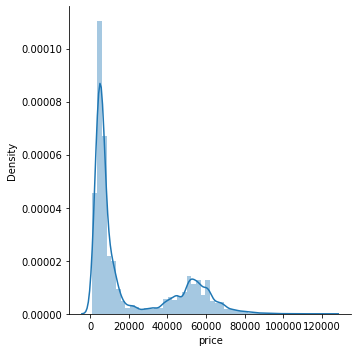

In [31]:
sns.FacetGrid(df,size=5).map(sns.distplot,"price").add_legend()

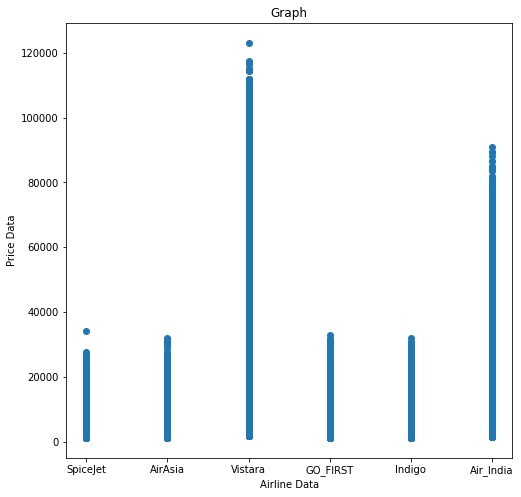

In [ ]:
plt.figure(figsize = (8, 8))
plt.title('Graph')
plt.xlabel('Airline Data')
plt.ylabel('Price Data')
plt.scatter(df['airline'],df['price'])

In this graph it is found correlation between airline and price, high price in Vistara airline then Air_India and the other are the same price

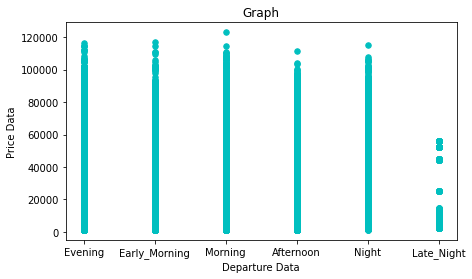

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Departure Data')
plt.ylabel('Price Data')

plt.scatter(df['departure_time'],df['price'],s=30,alpha=1,color= 'c')

With regard to departure time, in the late night, the price is low

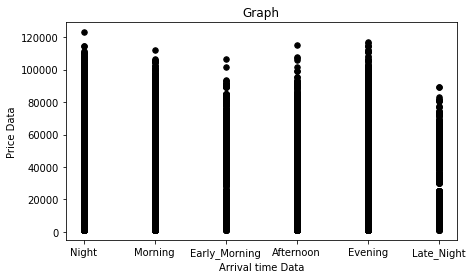

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Arrival time Data')
plt.ylabel('Price Data')

plt.scatter(df['arrival_time'],df['price'],s=30,alpha=1,color= 'k')

With regard to arrival time, in the late night, the price is slightly low

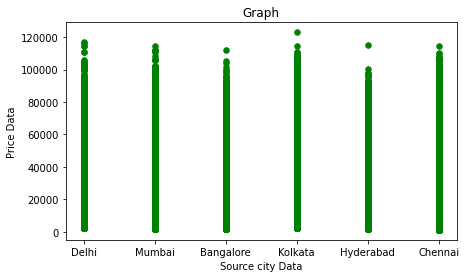

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Source city Data')
plt.ylabel('Price Data')

plt.scatter(df['source_city'],df['price'],s=30,alpha=1,color= 'g')

In source city, the price is very close to each other

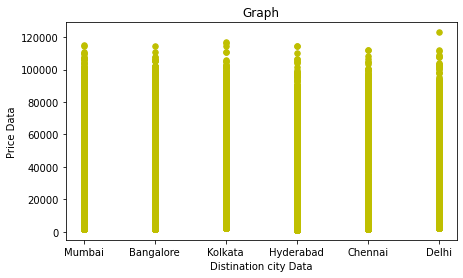

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Destination city Data')
plt.ylabel('Price Data')

plt.scatter(df['destination_city'],df['price'],s=30,alpha=1,color= 'y')

In destination city, the price also  very close to each other

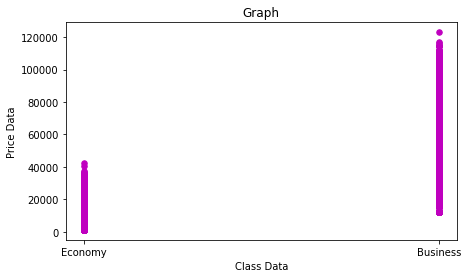

In [ ]:
plt.figure(figsize = (7, 4))
plt.title('Graph')
plt.xlabel('Class Data')
plt.ylabel('Price Data')

plt.scatter(df['class'],df['price'],s=30,alpha=1,color= 'm')


*   In economy class, the price of is cheap
*   In business class, the price is expensive



Text(0.5, 1.0, 'Airline prices based on the arrival time')

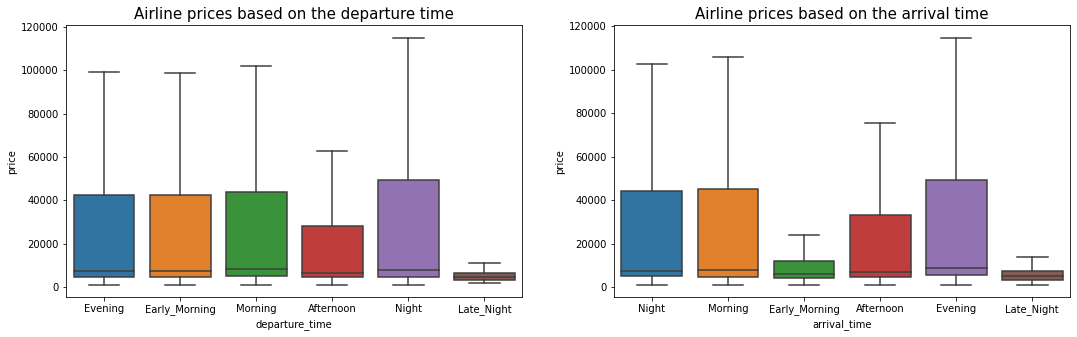

In [ ]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

1. **Departure Time Vs Ticket Price**

*   Ticket Price is More for the Flights when the Departure Time is at Night
*   Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening

*   Ticket Price is Low for the Flights Having Departure Time at Late_night

2. **Arrival Time Vs Ticket Price**

*   Ticket Price is More for the Flights when the Arrival Time is at Evening
*   Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

*   Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time







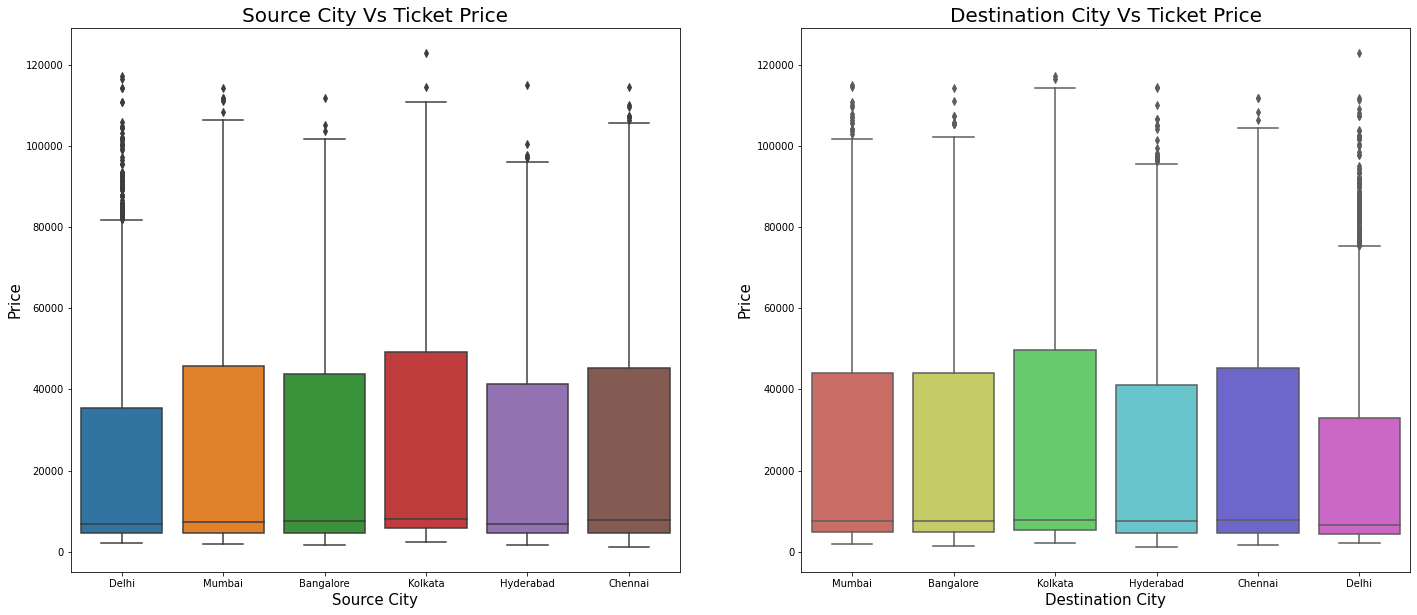

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


1. **Source City Vs Ticket Price**
*   Ticket Price is More for the Flights whose Source City is Kolkata
*   Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
*   Ticket Price is Low for the Flights Having Source City as Delhi

2. **Destination City Vs Ticket Price**

*   Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
*   Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
*   Ticket Price is Low for the Flights Having Destination City as Delhi





Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

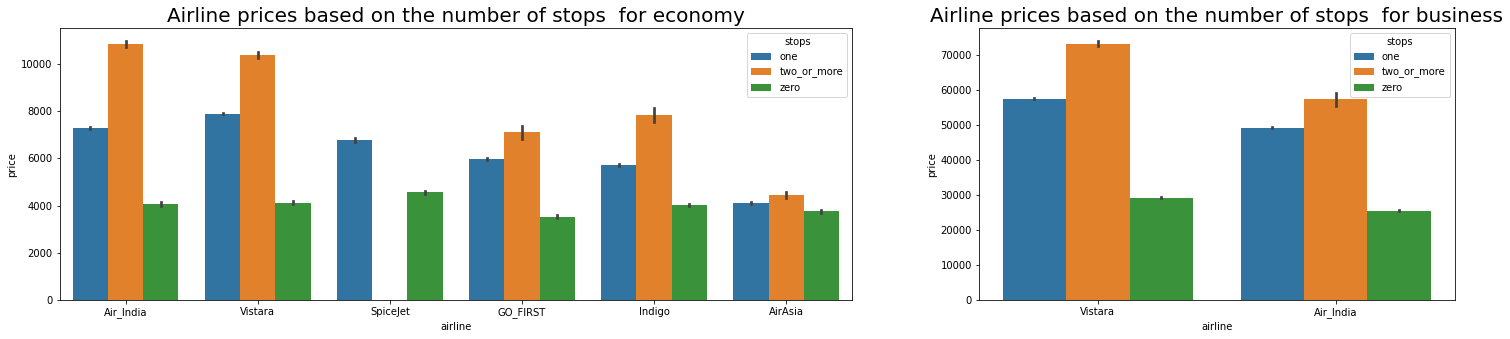

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

that the more stops there are the more expensive the flight is except for AirAsia where the prices seem more constant. The behavior and different analysis of AirAsia tend to show that it relates to a low-cost company.

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

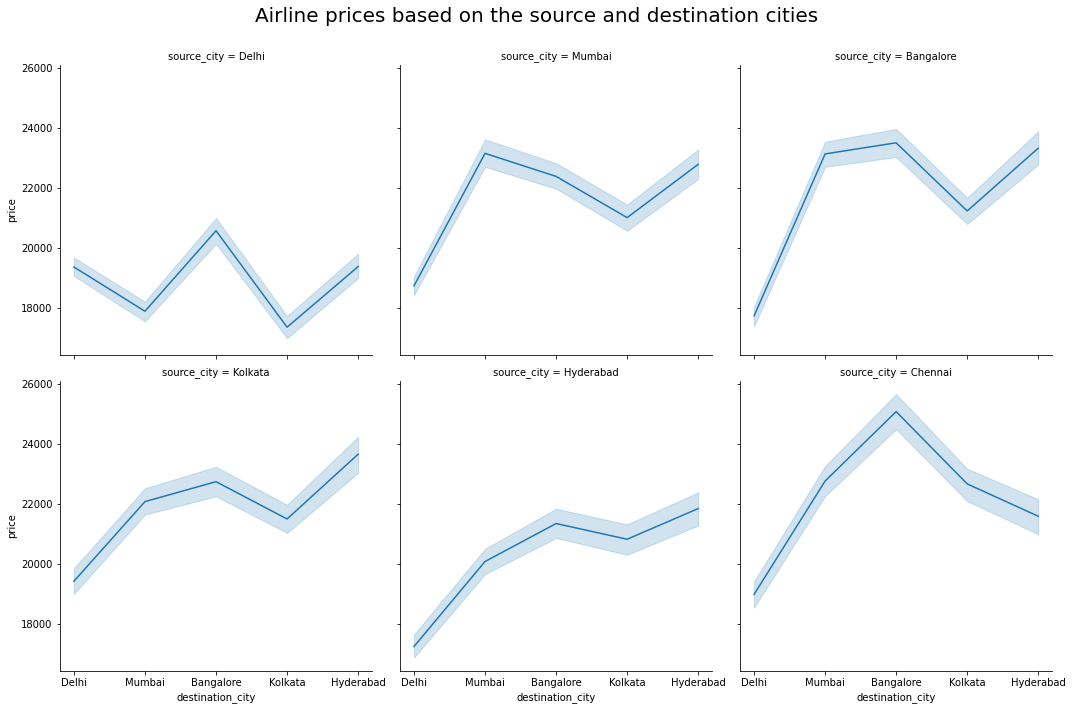

In [ ]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) 
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

On one hand, it seems that flights leaving from Delhi are often cheaper than from other source cities and the capital is also the cheapest destination to go to probably because as capital city, the airport is the biggest and proposes more flights. On the other hand, the prices are more or less similar Hyderabad is the most expensive destination.

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

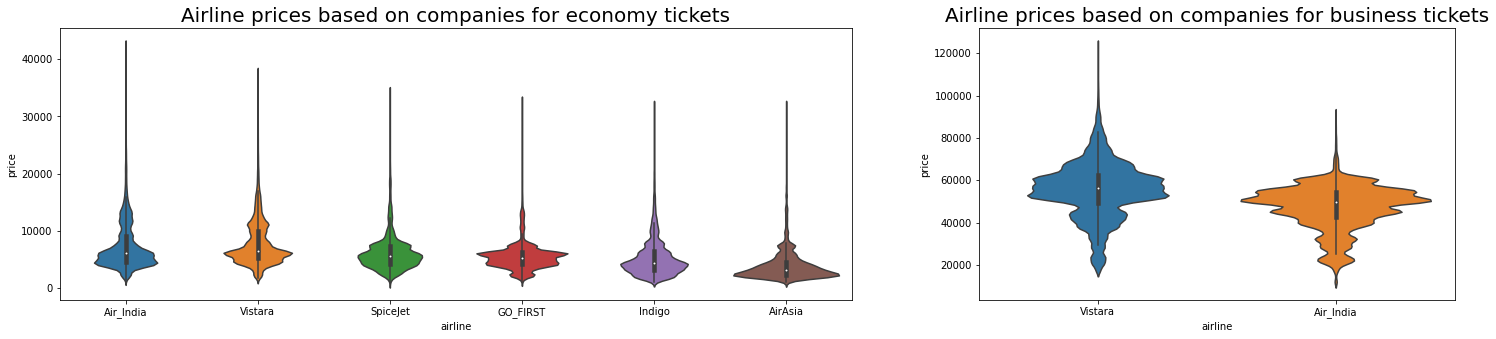

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "price", x = "airline",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.

# **Data Pre-processing**

In [ ]:
#Check Unique all column on dataset

In [ ]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
df.flight.unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [ ]:
df.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
df.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [ ]:
df.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [ ]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
df.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [44]:
# Creating a Back up File 
df_bk=df.copy()

In [45]:
#Change column values from object to integer
airline={'SpiceJet':0, 'AirAsia':1, 'GO_FIRST':2, 'Indigo':3, 'Air_India':4, 'Vistara':5}
df['airline'] = df['airline'].replace(airline)

stop={'zero':0, 'two_or_more':1, 'one':2}
df['stops'] = df['stops'].replace(stop)

class_ = {'Economy':0, 'Business':1}
df['class'] = df['class'].replace(class_)


In [46]:
df['duration'] = df['duration'].astype('int')

In [47]:
object_data = df.select_dtypes(include=['object'])
#convert data of object type to numbers
encoder = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:, i] = encoder.fit_transform(object_data.iloc[:, i])

#concat between data none object and data object after convert it
num_data = df.select_dtypes(exclude=['object'])
df = pd.concat([object_data, num_data], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [48]:
# check new dataframe
df

,flight,source_city,departure_time,arrival_time,destination_city,airline,stops,class,duration,days_left,price
0,1408,2,2,5,5,0,0,0,2,1,5953
1,1387,2,1,4,5,0,0,0,2,1,5953
2,1213,2,1,1,5,1,0,0,2,1,5956
3,1559,2,4,0,5,5,0,0,2,1,5955
4,1549,2,4,4,5,5,0,0,2,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,1477,1,4,2,3,5,2,1,10,49,69265
300149,1481,1,0,5,3,5,2,1,10,49,77105
300150,1486,1,1,5,3,5,2,1,13,49,79099
300151,1483,1,1,2,3,5,2,1,10,49,81585


In [49]:
#Check new dataType
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   flight            300153 non-null  int64
 1   source_city       300153 non-null  int64
 2   departure_time    300153 non-null  int64
 3   arrival_time      300153 non-null  int64
 4   destination_city  300153 non-null  int64
 5   airline           300153 non-null  int64
 6   stops             300153 non-null  int64
 7   class             300153 non-null  int64
 8   duration          300153 non-null  int64
 9   days_left         300153 non-null  int64
 10  price             300153 non-null  int64
dtypes: int64(11)
memory usage: 27.5 MB


In [50]:
#Check Outliers Data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR

flight                703.0
source_city             3.0
departure_time          3.0
arrival_time            3.0
destination_city        3.0
airline                 2.0
stops                   0.0
class                   1.0
duration               10.0
days_left              23.0
price               37738.0
dtype: float64

In [51]:
#Check correlation 
df.corr().style.background_gradient().set_precision(2)

<ipython-input-51-25c7be2adabc>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,flight,source_city,departure_time,arrival_time,destination_city,airline,stops,class,duration,days_left,price
flight,1.00,-0.01,0.07,0.07,-0.04,0.42,0.12,0.26,0.21,-0.00,0.31
source_city,-0.01,1.00,-0.00,0.04,-0.22,-0.00,-0.00,-0.00,0.01,-0.00,0.00
departure_time,0.07,-0.00,1.00,-0.05,-0.00,0.08,0.01,0.05,0.09,-0.00,0.06
arrival_time,0.07,0.04,-0.05,1.00,-0.04,0.05,-0.01,0.03,0.01,-0.00,0.04
destination_city,-0.04,-0.22,-0.00,-0.04,1.00,-0.01,0.01,-0.00,0.00,-0.01,0.00
airline,0.42,-0.00,0.08,0.05,-0.01,1.00,0.14,0.40,0.25,-0.02,0.43
stops,0.12,-0.00,0.01,-0.01,0.01,0.14,1.00,0.10,0.47,0.01,0.20
class,0.26,-0.00,0.05,0.03,-0.00,0.40,0.10,1.00,0.14,-0.01,0.94
duration,0.21,0.01,0.09,0.01,0.00,0.25,0.47,0.14,1.00,-0.04,0.21
days_left,-0.00,-0.00,-0.00,-0.00,-0.01,-0.02,0.01,-0.01,-0.04,1.00,-0.09


The correlation among all features

# **Data Modelling**

In [52]:
#Splitting DataSet
x = df.drop(['price'], axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((225114, 10), (75039, 10), (225114,), (75039,))

In [54]:
#Define the best model
lin_reg = LinearRegression()
rfr = RandomForestRegressor()

# Evalution matrix for all the algorithms
MM = [lin_reg , rfr]

for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    # Predict the model with test data
    y_pred = models.predict(x_test)
    # Print the model name
    print('Model Name: ', models)
    # Evaluation metrics for Regression analysis
    from sklearn import metrics
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score (accuracy):', round(metrics.r2_score(y_test, y_pred),6))
    print('------------------------------------------------------------------------------------------------------------')


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4629.295
Mean Squared Error (MSE): 50350175.02
Root Mean Squared Error (RMSE): 7095.786
R2_score (accuracy): 0.90235
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 952.568
Mean Squared Error (MSE): 6365450.05
Root Mean Squared Error (RMSE): 2522.984
R2_score (accuracy): 0.987655
------------------------------------------------------------------------------------------------------------


In [55]:
#Apply the model Random Forest 
#Training Random Forest model 
rfr.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = rfr.predict(x_test)

out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

#Result Price prediction of each column with Price actual using Random Forest
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
87703,Vistara,UK-852,Bangalore,Morning,one,Night,Delhi,Economy,12.42,20,4111,4111,4131.80
278372,Air_India,AI-542,Hyderabad,Afternoon,one,Afternoon,Mumbai,Business,23.67,20,29954,29954,30113.29
106366,Vistara,UK-852,Bangalore,Morning,one,Evening,Kolkata,Economy,7.33,27,6271,6271,6399.60
268001,Vistara,UK-720,Kolkata,Early_Morning,one,Night,Bangalore,Business,13.25,13,60978,60978,60978.00
239047,Vistara,UK-996,Mumbai,Evening,one,Morning,Hyderabad,Business,15.17,16,60365,60365,60576.02
117953,Vistara,UK-818,Bangalore,Evening,one,Evening,Chennai,Economy,20.67,30,6510,6510,6463.27
268444,Vistara,UK-738,Kolkata,Evening,one,Evening,Bangalore,Business,22.25,20,60978,60978,60978.00
47028,Vistara,UK-853,Mumbai,Afternoon,one,Night,Delhi,Economy,6.42,22,6122,6122,6122.00
176517,Air_India,AI-838,Hyderabad,Afternoon,one,Evening,Chennai,Economy,6.00,4,13168,13168,13416.36
198048,Vistara,UK-822,Chennai,Morning,one,Evening,Kolkata,Economy,10.17,5,11069,11069,14582.77


# **conclusion**


1. The model that gives the best result is the Random Forest with on the test dataset an R^2 score equals to 0.987655, an MAE score equal to 952.568 and RMSE score equal 2522.984. 

2. There is a big gap between flight tickets in business and economy. In average business tickets are 6.5 times more expensive than economy tickets.

3. Vistara and Air India seem to be the most expensive companies and AirAsia are the cheapest. However for business tickets, only Vistara and Air India are available, and Vistara is slightly more expensive.

4. In general, prices rise quite slowly until 20 days before the flight when the prices rise drastically. But one day before the flight, there usually are empty seats that have not been sold. Thus it is possible to find tickets three times cheaper than the day before.

5. The longer the flight is the more expensive the tickets are until it reaches around 20 hours, then the prices tend to decrease.

6. For the time of the flight:

   *   It seems that departure during the afternoon and late at night are cheaper, and night is more expensive.

   *   It seems that departure during the early morning, afternoon, and late night are cheaper, and evening is more expensive.

7. For the cities of the trip:

   *   Flights from Delhi are the cheapest from the others cities seem equal on average but slightly more expensive for Chennai.
   *   Flights to Delhi is the cheapest and to Bangalore the most expensive ones.

8. In general, the more stops there are, the more expensive the flight ticket is.



